In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("creulty (2).csv")
df.head()

,Districts,Severity,No of Animals
0,Trichur,4.9,1
1,Kakkoor,4.1,2
2,Kollam,2.8,1
3,Wayanad,4.9,1
4,Thrissur,3.8,1


Text(0, 0.5, 'No of Animals')

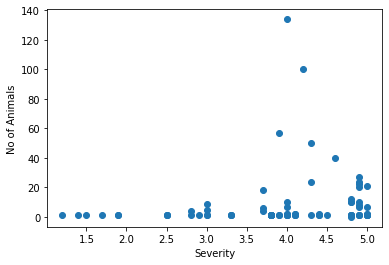

In [ ]:
plt.scatter(df.Severity,df['No of Animals'])
plt.xlabel('Severity')
plt.ylabel('No of Animals')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Severity','No of Animals']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Districts,Severity,No of Animals,cluster
0,Trichur,4.9,1,0
1,Kakkoor,4.1,2,0
2,Kollam,2.8,1,0
3,Wayanad,4.9,1,0
4,Thrissur,3.8,1,0


In [ ]:
km.cluster_centers_

array([[  3.88      ,   2.44285714],
       [  4.1       , 117.        ],
       [  4.54      ,  30.3       ]])

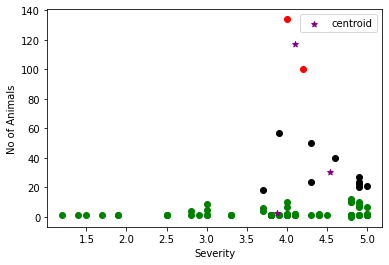

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Severity,df1['No of Animals'],color='green')
plt.scatter(df2.Severity,df2['No of Animals'],color='red')
plt.scatter(df3.Severity,df3['No of Animals'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Severity')
plt.ylabel('No of Animals')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['No of Animals']])
df['No of Animals'] = scaler.transform(df[['No of Animals']])

scaler.fit(df[['Severity']])
df['Severity'] = scaler.transform(df[['Severity']])

In [ ]:
df.head()

,Districts,Severity,No of Animals,cluster
0,Trichur,0.973684,0.007463,0
1,Kakkoor,0.763158,0.014925,0
2,Kollam,0.421053,0.007463,0
3,Wayanad,0.973684,0.007463,0
4,Thrissur,0.684211,0.007463,0


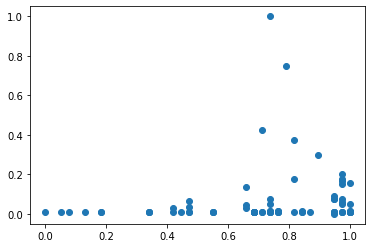

In [ ]:
plt.scatter(df.Severity,df['No of Animals'])

In [ ]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Severity','No of Animals']])
y_predicted

array([1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Districts,Severity,No of Animals,cluster
0,Trichur,0.973684,0.007463,1
1,Kakkoor,0.763158,0.014925,1
2,Kollam,0.421053,0.007463,0
3,Wayanad,0.973684,0.007463,1
4,Thrissur,0.684211,0.007463,1


In [ ]:
l1=[]
l2=[]
l3=[]
for ind in df.index:
  if df['cluster'][ind]==0:
    l1.append(df['Districts'][ind])
  if df['cluster'][ind]==1:
    l2.append(df['Districts'][ind])
  if df['cluster'][ind]==2:
    l3.append(df['Districts'][ind])
l1=list(set(l1))
l2=list(set(l2))
l3=list(set(l3))
l=[len(l1),len(l2),len(l3)]
m=max(l)
l1.extend([''] * (m-len(l1)))
l2.extend([''] * (m-len(l2)))
l3.extend([''] * (m-len(l3)))

In [ ]:
ld = pd.DataFrame({'1':l1,'2':l2,'3':l3})
ld.head()

,1,2,3
0,Thrissur,Perumbavoor,Trivandrum
1,Guruvayur,Pathanamthitta and Kollam districts,Thrissur
2,,Kunnamangalam,Kollam
3,,Kozhikode,
4,,Palakkad,


In [ ]:
from google.colab import files
ld.to_csv('output.csv') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

km.cluster_centers_

array([[0.76315789, 0.63619403],
       [0.84968778, 0.04211991],
       [0.34210526, 0.01335428]])

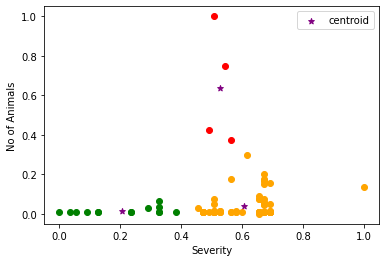

In [ ]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Severity,df1['No of Animals'],color='red')
plt.scatter(df2.Severity,df2['No of Animals'],color='orange')
plt.scatter(df3.Severity,df3['No of Animals'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Severity')
plt.ylabel('No of Animals')
plt.legend()

'/content/FigureName.png'

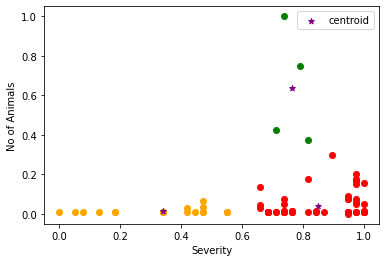

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files

def fun():
    df = pd.read_csv("/content/creulty (2).csv")
    #df.head()
    km = KMeans(n_clusters=3)
    y_predicted = km.fit_predict(df[['Severity','No of Animals']])
    df['cluster']=y_predicted
    scaler = MinMaxScaler()

    scaler.fit(df[['No of Animals']])
    df['No of Animals'] = scaler.transform(df[['No of Animals']])

    scaler.fit(df[['Severity']])
    df['Severity'] = scaler.transform(df[['Severity']])
    km = KMeans(n_clusters=3)
    y_predicted = km.fit_predict(df[['Severity','No of Animals']])
    df['cluster']=y_predicted
    df1 = df[df.cluster==0]
    df2 = df[df.cluster==1]
    df3 = df[df.cluster==2]
    plt.scatter(df1.Severity,df1['No of Animals'],color='red')
    plt.scatter(df2.Severity,df2['No of Animals'],color='orange')
    plt.scatter(df3.Severity,df3['No of Animals'],color='green')
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
    plt.xlabel('Severity')
    plt.ylabel('No of Animals')
    plt.legend()
    plt.savefig('/content/FigureName.png')
    return '/content/FigureName.png'
    l1=[]
    l2=[]
    l3=[]
    for ind in df.index:
    if df['cluster'][ind]==0:
        l1.append(df['Districts'][ind])
    if df['cluster'][ind]==1:
        l2.append(df['Districts'][ind])
    if df['cluster'][ind]==2:
        l3.append(df['Districts'][ind])
    l1=list(set(l1))
    l2=list(set(l2))
    l3=list(set(l3))
    l=[len(l1),len(l2),len(l3)]
    m=max(l)
    l1.extend([''] * (m-len(l1)))
    l2.extend([''] * (m-len(l2)))
    l3.extend([''] * (m-len(l3)))
    ld = pd.DataFrame({'1':l1,'2':l2,'3':l3})
    ld.head()
    ld.to_csv('output.csv') 
    files.download('output.csv')
    
    
r= fun()
r